# Başlangıç Aşamaları: Görseli Tanımlama ve Okuma

---



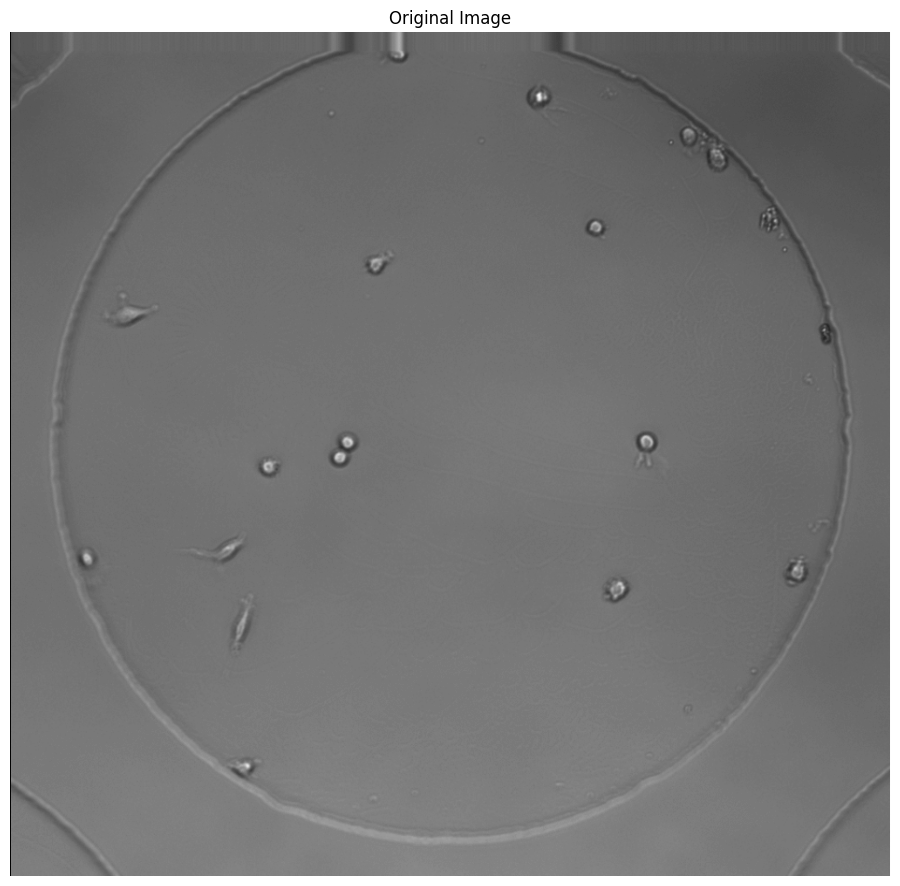

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Aşağıda belirtilen algoritma segmenti, 'hucre.png' adı verilen bir görüntü dosyasının yüklenip yüklenemediğini sorgular ve eğer söz konusu dosya
# mevcut değilse, bir uyarı mesajını kullanıcı arayüzünde görüntüler. Dosyanın başarıyla yüklenmesi durumunda, algoritma görüntünün orijinal halini
#ekranda sergiler. Bu işlem, dosya erişilebilirliğinin kontrol edilmesi ve görüntüleme işlevlerinin uygulanması bakımından önemli bir adımdır.
#Bu durum, veri yolu üzerindeki dosyanın durumunu denetlemek ve bulguları görsel olarak sunmak için kullanılan standart bir yöntemdir.

# Orjinal Görsel
imagePath = "hucre.png" # Dosya yolu
originalPhoto = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE) # Belirtilen dosya yolundaki görüntüyü gri tonlamaya dönüştürerek okur.

if originalPhoto is None:
    print("Görsel bulunamadı! Lütfen dosya yolunu kontrol ediniz.")
else:
  plt.figure(figsize=(25, 25))  # Genişlik ve yükseklik
  plt.subplot(2, 2, 1)
  plt.title('Original Image')
  plt.axis('off')
  plt.imshow(originalPhoto, cmap='gray')

# 1. Verilen Görüntüye Keskinleştirme İşlemi Uygulama


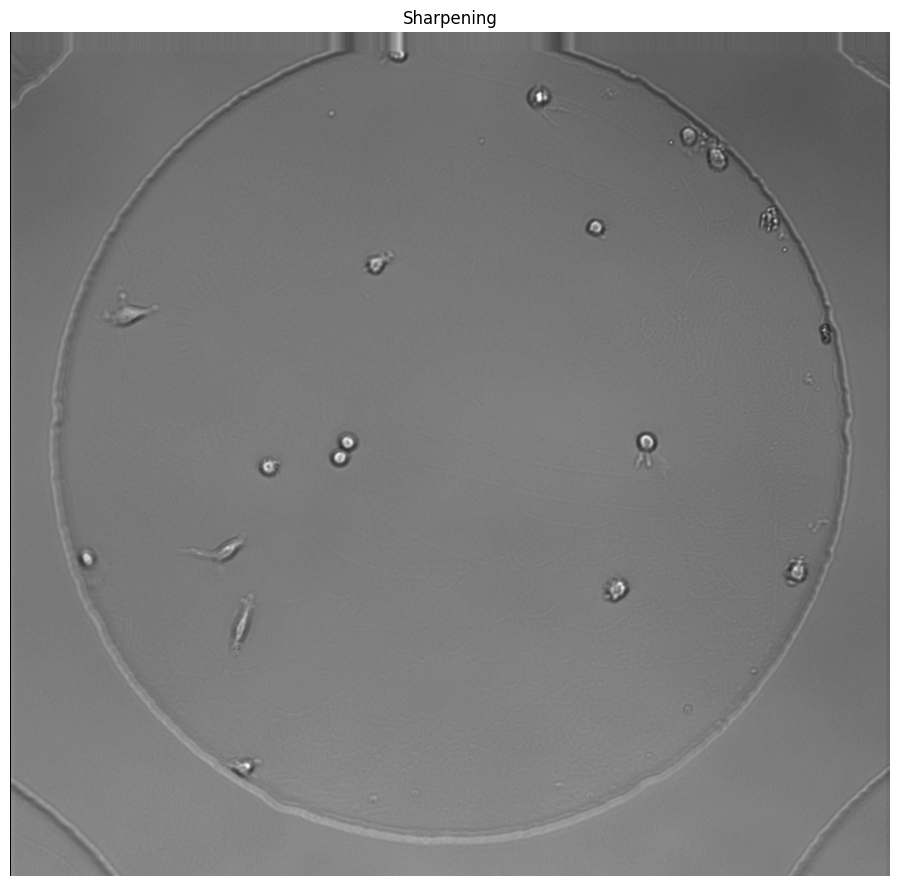

In [47]:
# İlk etapta yüklenen görsel üzerinde gerçekleştirilen işlemler, görüntü keskinleştirme metodolojileri içermektedir.
# İlk olarak, Gaussian Bulanıklaştırma (Gaussian Blur) teknikleri, görüntüdeki istenmeyen gürültü ve detayların yumuşatılması amacıyla uygulanmıştır.
# Kullanılan 9x9 boyutundaki kernel, bu bulanıklaştırma işleminin yoğunluğunu tanımlamaktadır. Standart sapma değeri olan 10, bulanıklaştırmanın
# yayılma derecesini kontrol eder ve bu parametre bulanıklık etkisinin ne ölçüde genişleyeceğini belirler.
# İkinci aşamada, addWeighted fonksiyonu devreye sokularak görselin detayları üzerinde vurgulama yapılmış ve görüntü daha keskin bir hal alması
# sağlanmıştır. Bu işlem sırasında, bulanıklaştırılmış görüntünün negatif değerlerinin orijinal görüntüye eklenmesiyle kenar vurgulamaları
# güçlendirilmiş ve netlik artırılmıştır. Burada kullanılan 1.5 ağırlık katsayısı, orijinal görüntünün ne oranda korunacağını ifade ederken,
# 0.5 değeri bulanık görüntünün ağırlığını belirlemektedir. Bu süreçlerin tamamı, görsel detayların artırılmasına ve buna bağlı olarak görüntü
# kalitesinin iyileştirilmesine katkıda bulunmaktadır.

if originalPhoto is None:
    print("Görsel bulunamadı! Lütfen dosya yolunu kontrol ediniz.")
else:
  #image = cv2.normalize(originalPhoto, None, 0, 255, cv2.NORM_MINMAX) # Görüntüyü 0 ile 255 değerleri arasında normalize eder.
  #sharpened = cv2.filter2D(originalPhoto, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])) # Keskinleştirme filtresi uygular.

  #ilk önce yukarıda ki işlemleri uyguladım ama ilk tahminimdeki gibi kolay bir işlem olmadı.

  #gaussian_blur = cv2.GaussianBlur(originalPhoto, (3, 3), 10)
  #unsharp_image = cv2.addWeighted(originalPhoto, 1.5, gaussian_blur, -0.5, 0)

  #sonrasında yukarıdaki kodları uyguladım ve ağırlık ekledim a 3x3 lük kernek de hedefime ulaştırmadı.

  gaussianBlurPhoto = cv2.GaussianBlur(originalPhoto, (9, 9), 10)
  sharpenedImage = cv2.addWeighted(originalPhoto, 1.5, gaussianBlurPhoto, -0.5, 0)

  #son olarak çözümü yukarıdaki kodlarla buldum. 9x9 luk kernel uyguladığımda görüntüyü sizin görüntünüze daha çok benzettim.

  plt.figure(figsize=(25, 25))  # Genişlik ve yükseklik
  plt.subplot(2, 2, 1)
  plt.title('Sharpening')
  plt.axis('off')
  plt.imshow(sharpenedImage, cmap='gray')


# 2. Görüntüye Eşikleme Yöntemi Uygulayarak İkili Görüntüye Dönüştürme

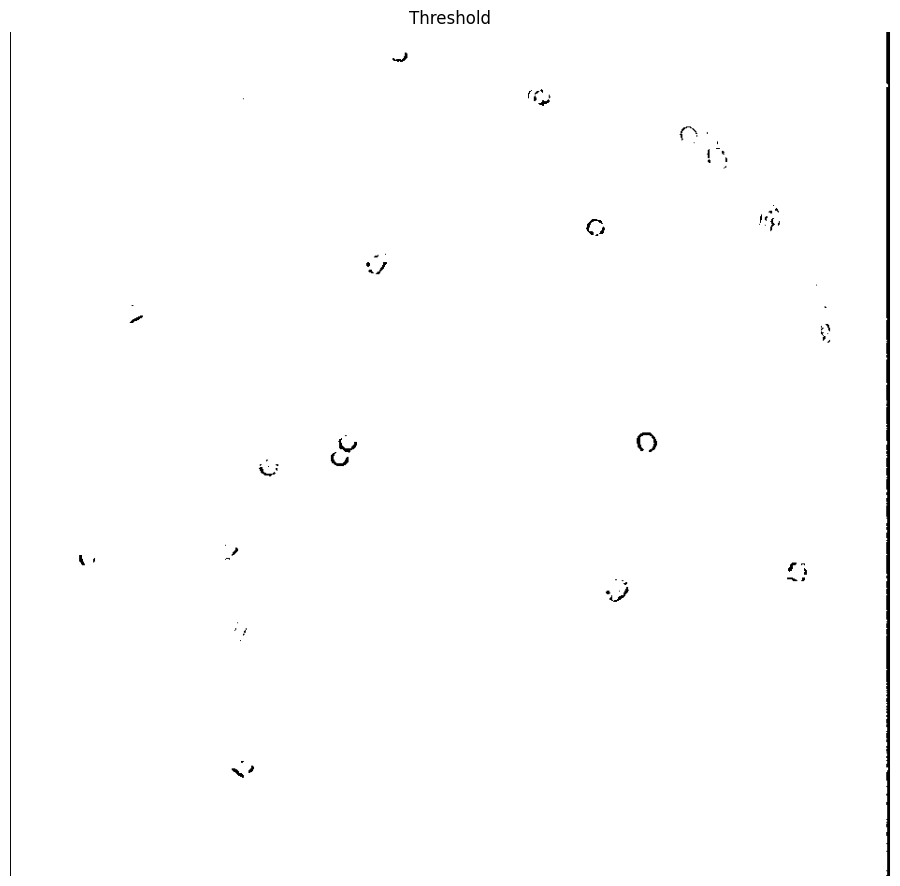

In [48]:
# Görüntü işleme sürecinde bir dizi denemeler uygulanmıştır.
# Nihai olarak, adaptif eşikleme metodunun (adaptiveThreshold) uygulanmasıyla en tatmin edici sonuçlara ulaşıldığı gözlemlenmiştir.
# Adaptif eşikleme, lokal görüntü özelliklerine dayalı olarak dinamik bir eşik değeri belirleyen ve böylece sabit eşikleme metodlarına göre
# daha esnek sonuçlar üreten bir tekniktir. Bu bağlamda, maksimum piksel değeri olarak belirlenen 155, eşikleme işlemi sonucunda piksellerin
# beyaza dönüştürülmesi için kullanılan değerdir. Eşikleme işleminin ikili doğasını (THRESH_BINARY) ifade eden bu parametre, piksellerin ya
# maksimum ya da minimum değere ayarlandığı bir karar mekanizması uygular. Burada belirtilen 23 piksellik blok boyutu, her bir piksel için eşik
# değerinin hesaplanmasında kullanılan yerel komşuluk alanını temsil eder ve bu, 23x23'lük bir matris kullanılarak gerçekleştirilir.
# Ek olarak, sabit C olarak ifade edilen 29 değeri, ortalama veya ağırlıklı ortalama hesaplamalarından çıkarılacak olan ayar değeridir.
# Bu süreçteki detaylı parametre ayarlamaları, veri setinin özelliklerine en uygun sonuçları elde etmek için titizlikle seçilmiştir.
# Elde edilen sonuçlar, adaptif eşikleme tekniğinin, verilen görüntü işleme senaryosunda başarılı bir şekilde uygulandığını göstermektedir.

#Aşağıdaki kod bloğunda eşikleme yöntemi uygulanmıştır.

if sharpenedImage is None:
    print("Keskinleştirme adımı uygulanmadı! Lütfen önceki aşamayı çalıştırdıktan sonra tekrar deneyiniz.")
else:
    #(T, invertedThresh) = cv2.threshold(sharpenedImage, 160, 255, cv2.THRESH_BINARY_INV)
    #(T, thresh) = cv2.threshold(sharpenedImage, 160, 255, cv2.THRESH_BINARY)
    #ret, invertedThresh = cv2.threshold(sharpenedImage, 120, 255, cv2.THRESH_TRUNC)
    #ret, thresh = cv2.threshold(sharpenedImage, 160, 255, cv2.THRESH_TOZERO)
    #invertedThresh = cv2.bitwise_not(thresh) # Siyah ve beyaz renkleri değiştirerek eşiklenmiş görüntüyü tersine çevirir. Görüntü pikselleri 0-1 aralığına getirilir.

    #doğru işlemi bulabilmek için yukarıda yer alan yöntemleri denedim ama istediğim verimi sadece aşağıdaki kodda bulabildim.
    invertedThresh = cv2.adaptiveThreshold(sharpenedImage, 155, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 23, 29)

    #invertedThresh = cv2.bitwise_not(invertedThresh)

    plt.figure(figsize=(25, 25))  # Genişlik ve yükseklik
    plt.subplot(2, 2, 1)
    plt.title('Threshold')
    plt.axis('off')
    plt.imshow(invertedThresh, cmap='gray')


# 3. Bileşen Sayısını Azaltmak için Morfolojik Teknik Uygulama


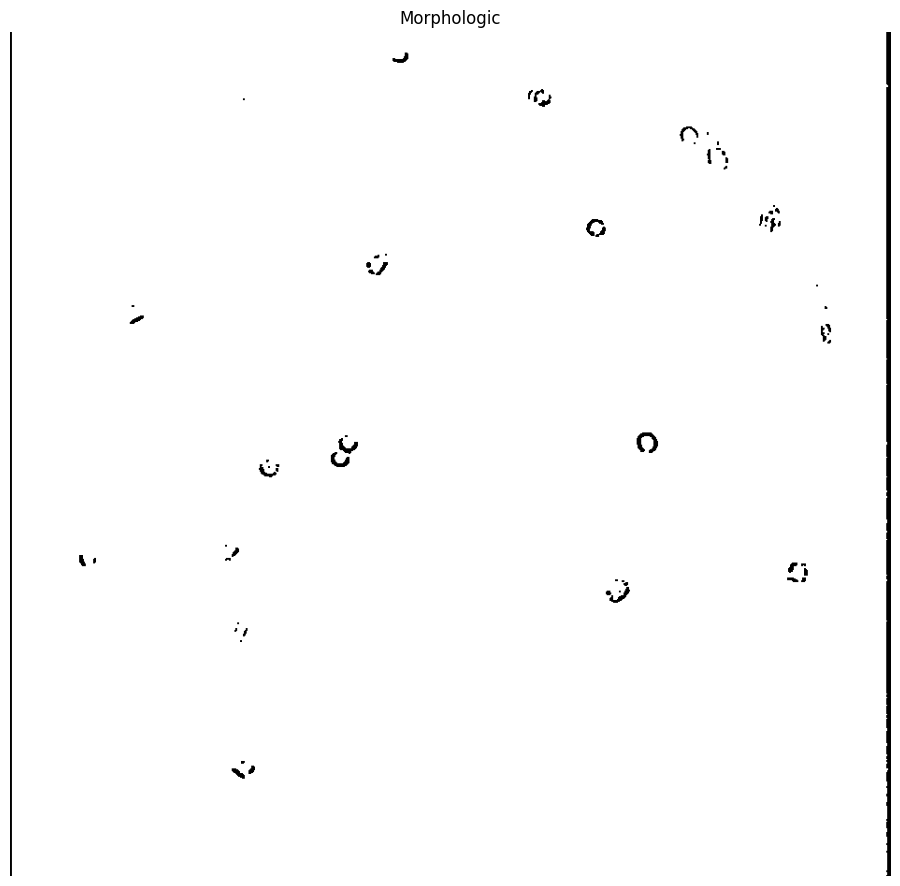

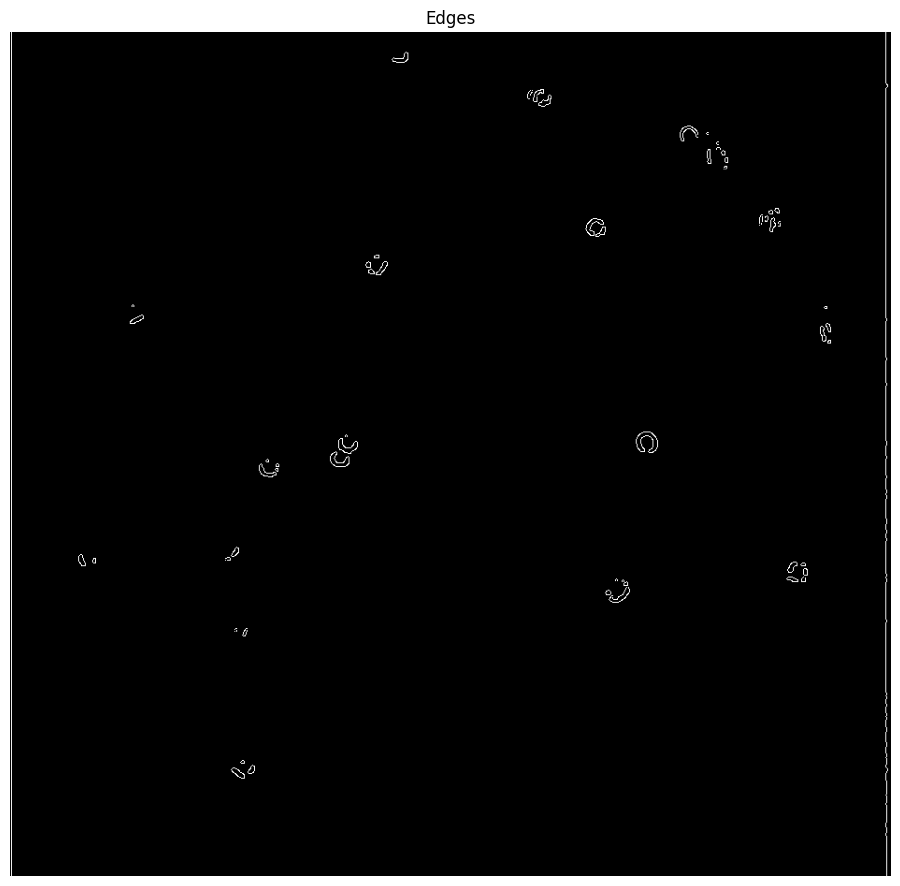

In [49]:
# Gürültüyü azaltmak ve istenmeyen noktaları görüntüden çıkartmak için açma (opening) işlemi uygulanmıştır.
# Seçilen kernel boyutunda nesne sınırlarını düzeltmek ve nesneler arasında boşlukları küçültmek için kullanılmıştır.
# Canny ise erozyon işlemini yapılmış görseli alarak dış hatlarını belirlemek için kullanıldı.

if invertedThresh is None:
    print("Threshold adımı uygulanmadı! Lütfen önceki aşamayı çalıştırdıktan sonra tekrar deneyiniz.")
else:
    openingLastResult = cv2.morphologyEx(invertedThresh, cv2.MORPH_OPEN, np.ones((1, 1), np.uint8))
    erosionLastResult = cv2.erode(openingLastResult, np.ones((2, 2), np.uint8), iterations=1)

    plt.figure(figsize=(25, 25))  # Genişlik ve yükseklik
    plt.subplot(2, 2, 1)
    plt.title('Morphologic')
    plt.axis('off')
    plt.imshow(erosionLastResult, cmap='gray')

    edgeList = cv2.Canny(erosionLastResult, 100,200)

    plt.figure(figsize=(25, 25))  # Genişlik ve yükseklik
    plt.subplot(2, 2, 1)
    plt.title('Edges')
    plt.axis('off')
    plt.imshow(edgeList, cmap='gray')

# 4. Verilen Görüntülere Bağlantı Bileşeni Etiketleme

---



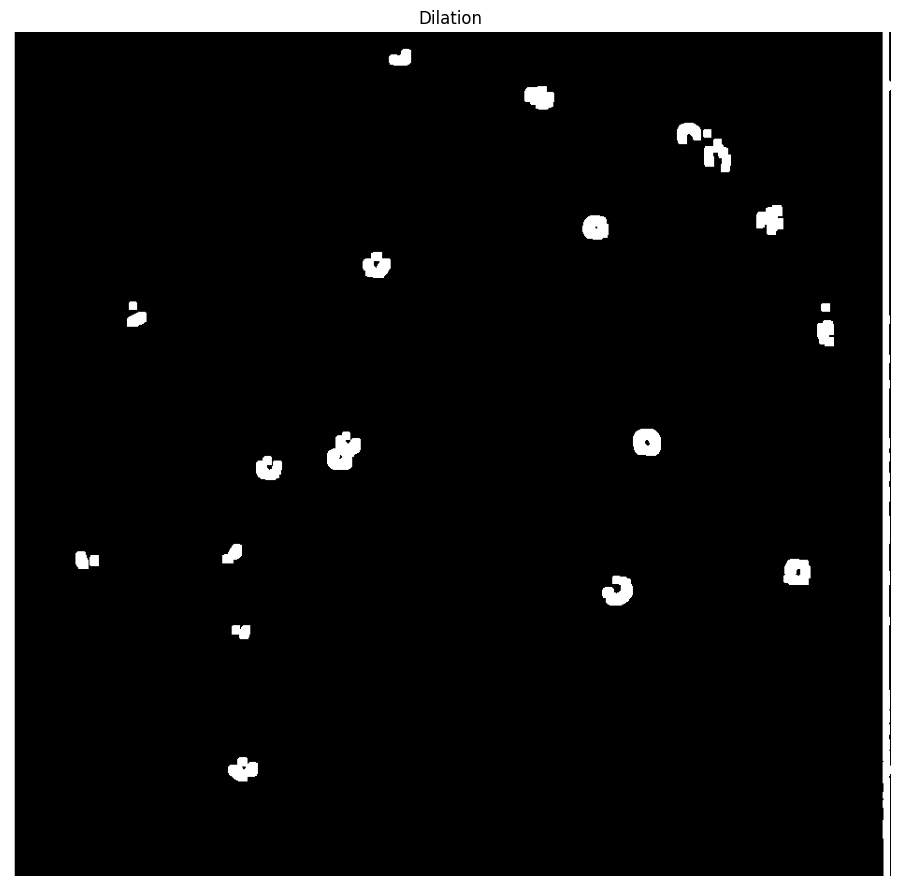

In [50]:
if edgeList is None:
    print("Edges adımı uygulanmadı! Lütfen önceki aşamayı çalıştırdıktan sonra tekrar deneyiniz.")
else:
    dilatedEdgeKernelSize = np.ones((7,7), np.uint8)
    dilatedEdgeFinalResult = cv2.dilate(edgeList,dilatedEdgeKernelSize,iterations=1)

     # Bağlı bileşenleri bul ve istatistikleri al
    _, labels, stats, centroids = cv2.connectedComponentsWithStats(dilatedEdgeFinalResult)

    #filtered_mask = np.isin(labels, np.arange(1, len(stats))).astype(np.uint8) * 255 # Sadece belirli boyuttaki etiketleri içeren bir maske oluşturma
    #denoised_image = cv2.bitwise_and(cv2.bitwise_not(image), cv2.bitwise_not(filtered_mask)) # Küçük gürültüleri orijinal görüntüden çıkarma
    #(T_denoised, denoised_thresh) = cv2.threshold(denoised_image, 50, 255, cv2.THRESH_BINARY) # Eşikleme işlemi uygulama (siyah-beyaz)
    #invertedDenoisedThresh = cv2.bitwise_not(denoised_thresh)

    #coloredImage = np.zeros((denoised_thresh.shape[0], denoised_thresh.shape[1], 3), dtype=np.uint8)
    dilatedImage = dilatedEdgeFinalResult

    plt.figure(figsize=(25, 25))  # Genişlik ve yükseklik
    plt.subplot(2, 2, 1)
    plt.title('Dilation')
    plt.axis('off')
    plt.imshow(dilatedImage, cmap='gray')

# 5.6.7. Aşamaları Aşağıdaki 3 maddeyi içermektedir.

5. Algılanan Bileşenleri/nesneleri Farklı Renklerle Görüntüleme
6. Her Bölge/nesne İçin Alanı, Yönü ve Daireselliği Hesaplama
7. Her Bölgenin Sınıf Piksellerini Tanımlama ve Alanın Çevreye Oranını, Kompaktlığını Hesaplama

Bölge/nesne 1 alanı: 4515 , yönü: 0.00, daireselliği: 12.57
Hücre 1 alanı: 3608.0, Hücre çevresi: 1812.0, Hücre kompaktlığı: 1.99
Bölge/nesne 2 alanı: 6599 , yönü: 0.00, daireselliği: 10.20
Hücre 1 alanı: 5690.0, Hücre çevresi: 1835.0538227558136, Hücre kompaktlığı: 3.10
Bölge/nesne 3 alanı: 329 , yönü: 0.05, daireselliği: 9.57
Hücre 1 alanı: 293.5, Hücre çevresi: 74.38477599620819, Hücre kompaktlığı: 3.95
Bölge/nesne 4 alanı: 626 , yönü: 0.11, daireselliği: 9.83
Hücre 1 alanı: 577.5, Hücre çevresi: 101.21320307254791, Hücre kompaktlığı: 5.71
Bölge/nesne 5 alanı: 449 , yönü: 0.14, daireselliği: 9.44
Hücre 1 alanı: 404.0, Hücre çevresi: 96.28427076339722, Hücre kompaktlığı: 4.20
Bölge/nesne 6 alanı: 79 , yönü: 0.14, daireselliği: 12.26
Hücre 1 alanı: 63.0, Hücre çevresi: 30.82842707633972, Hücre kompaktlığı: 2.04
Bölge/nesne 7 alanı: 633 , yönü: 0.15, daireselliği: 7.62
Hücre 1 alanı: 560.5, Hücre çevresi: 150.04163014888763, Hücre kompaktlığı: 3.74
Bölge/nesne 8 alanı: 679 , yönü: 0.23

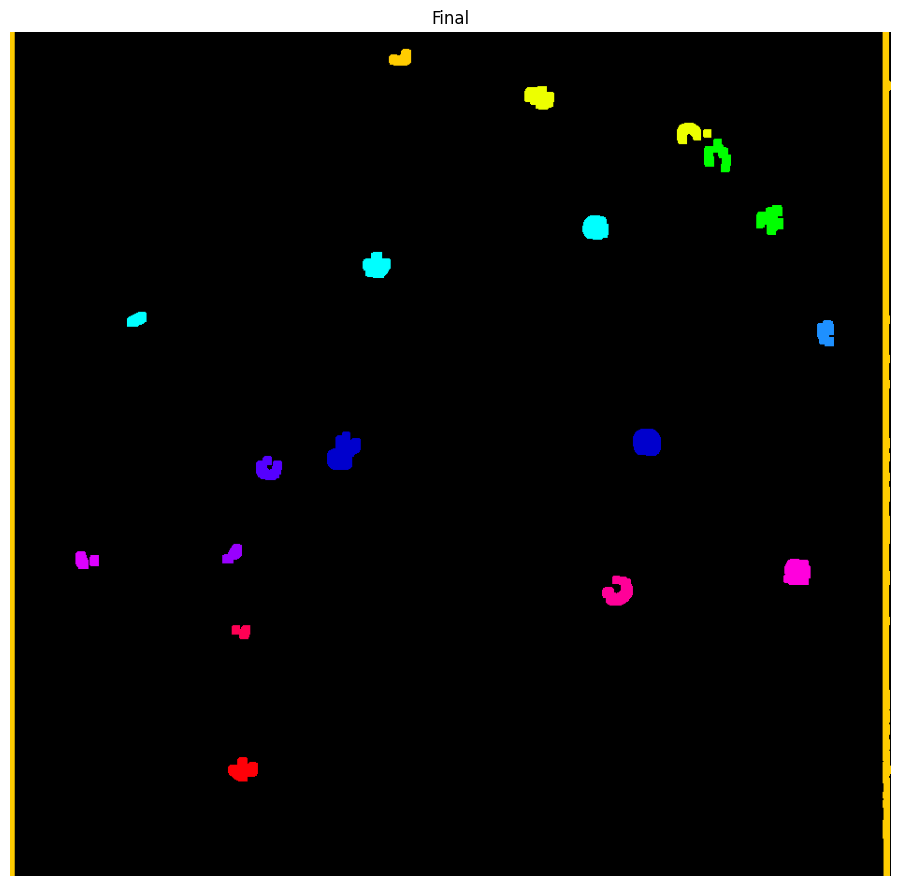

In [51]:
# Aşağıdaki adımda label etiketleriyle manuel renklendirme işlemi uyguladım Bu şekilde renkleri tutturabildim.
# Eğer otomatik renklendirme işlemi ile yapılması gerekiyorsa aşağıda bulunan #colorMap = cv2.applyColorMap(np.uint8(labels * 255 / labels.max()), cv2.COLORMAP_JET)
# Kod satırını aktif ederek otomatik renklendirme varyasyonu da görünebilir. Raporda bu görüntüye de yer verdim.

def paintingFunction(label,circularity):
    #6 - bekle
    #11 gizle
    #12 gizle
    if 1 <= label <= 3:
        return (255,204,0)
    elif 4 <= label <= 6:
        return (237, 255, 0)
    elif 7 <= label <= 8:
        return (0, 255, 0)
    elif 9 == label:
        return (0, 255, 255)
    elif 10 <= label <= 13:
        if label == 11 or label == 12:
          return (0, 0, 0)
        else:
          return (0, 255, 255)
    elif 14 == label:
        return (30,144,255)
    elif 15 <= label <= 16:
        return (0, 0, 205)
    elif 17 == label:
        return (85,0,255)
    elif 18 == label:
        return (153,0,255)
    elif 19 <= label <= 20:
        return (221,0,255)
    elif 21 == label:
        return (255, 0, 221)
    elif 22 == label:
        return (255, 0, 152)
    elif 23 == label:
        return (255, 0, 84)
    elif 24 == label:
        return (255, 0,8)
    elif 25 >= label <= 100:
        return (255, 255,255)
    else:
      return (0, 0, 0)

if dilatedImage is None:
    print("Dilation adımı uygulanmadı! Lütfen önceki aşamayı çalıştırdıktan sonra tekrar deneyiniz.")
else:
    dilatedImage = cv2.cvtColor(dilatedImage,cv2.COLOR_BGR2RGB)
    #colorMap = cv2.applyColorMap(np.uint8(labels * 255 / labels.max()), cv2.COLORMAP_JET)

    # Her bir etiket için renkli görüntünün güncellenmesi
    for i in range(1, len(stats)):

      # Alanı hesaplıyoruz.
      area = stats[i][4]  # İstatistikler dizisinin 4. sütunu alanı temsil eder

      # Yönü hesaplıyoruz
      centroid = (stats[i][0], stats[i][1])  # İstatistikler dizisinin 0. ve 1. sütunları x ve y koordinatlarını temsil eder
      direction = np.arctan2(centroid[1], centroid[0])
      circularity = 4 * np.pi * float(area) / (float(stats[i][2] * stats[i][3]))

      print("Bölge/nesne {} alanı: {} , yönü: {:.2f}, daireselliği: {:.2f}".format(i, area, direction, circularity))

      # Filtrelenmiş maskeden sadece o etiketin piksellerini alıyoruz
      selectedPixels = (labels == i).astype(np.uint8) * 255

      # Daireselliği kontrol ediyoruz. Eğer daireselliği 0.2 üzerindeyse (küçük noktaları pürüzleri boyamak istemiyorum) boyama işlemi için gerekli fonksiyona gönderiyorum.
      color = paintingFunction(i,circularity) if circularity > 0.2 else (0, 0, 0)

      contours, _ = cv2.findContours(selectedPixels, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

      # Renklendirilmiş görüntü oluşturma ve konturları boyama adımıdır.
      # Her bir gücre için belirlenen renk kullanılarak kontur boyanır. DrawContours methodu, belirtilen renkte konturu boyar.
      # Renklendirilmiş görüntü, her bir hücrenin renkli konturlarını içerir. Dairesellik değerine göre belirlenmiştir.

      for j, contour in enumerate(contours, start=1):
          cv2.drawContours(dilatedImage, [contour], -1, color, thickness=cv2.FILLED)

      # Her bölge içindeki hücrelerin kompaktlık hesaplaması ve konturların bulunması
      contours, _ = cv2.findContours(selectedPixels, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

      # Her bir kontur için kompaktlık hesaplaması
      for j, contour in enumerate(contours, start=1):
          contourArea = cv2.contourArea(contour) # Kontur alanını hesaplama
          contour_perimeter = cv2.arcLength(contour, True) # Kontur çevresini hesaplama
          compactness = contourArea / contour_perimeter if contour_perimeter != 0 else 0 # Kompaktlık hesaplama
          print("Hücre {} alanı: {}, Hücre çevresi: {}, Hücre kompaktlığı: {:.2f}".format(j, contourArea, contour_perimeter, compactness))

    plt.figure(figsize=(25, 25))  # Genişlik ve yükseklik
    plt.subplot(2, 2, 1)
    plt.title('Final')
    plt.axis('off')
    plt.imshow(dilatedImage, cmap='gray')

# Sıralı Tüm Adımların Görselleri

Hücre 1 alanı: 3608.0, Hücre çevresi: 1812.0, Hücre kompaktlığı: 1.99
Hücre 1 alanı: 5690.0, Hücre çevresi: 1835.0538227558136, Hücre kompaktlığı: 3.10
Hücre 1 alanı: 293.5, Hücre çevresi: 74.38477599620819, Hücre kompaktlığı: 3.95
Hücre 1 alanı: 577.5, Hücre çevresi: 101.21320307254791, Hücre kompaktlığı: 5.71
Hücre 1 alanı: 404.0, Hücre çevresi: 96.28427076339722, Hücre kompaktlığı: 4.20
Hücre 1 alanı: 63.0, Hücre çevresi: 30.82842707633972, Hücre kompaktlığı: 2.04
Hücre 1 alanı: 560.5, Hücre çevresi: 150.04163014888763, Hücre kompaktlığı: 3.74
Hücre 1 alanı: 617.5, Hücre çevresi: 127.21320295333862, Hücre kompaktlığı: 4.85
Hücre 1 alanı: 576.0, Hücre çevresi: 92.28427064418793, Hücre kompaktlığı: 6.24
Hücre 1 alanı: 581.5, Hücre çevresi: 102.04163014888763, Hücre kompaktlığı: 5.70
Hücre 1 alanı: 63.0, Hücre çevresi: 30.82842707633972, Hücre kompaktlığı: 2.04
Hücre 1 alanı: 71.0, Hücre çevresi: 32.82842707633972, Hücre kompaktlığı: 2.16
Hücre 1 alanı: 235.5, Hücre çevresi: 62.3847759

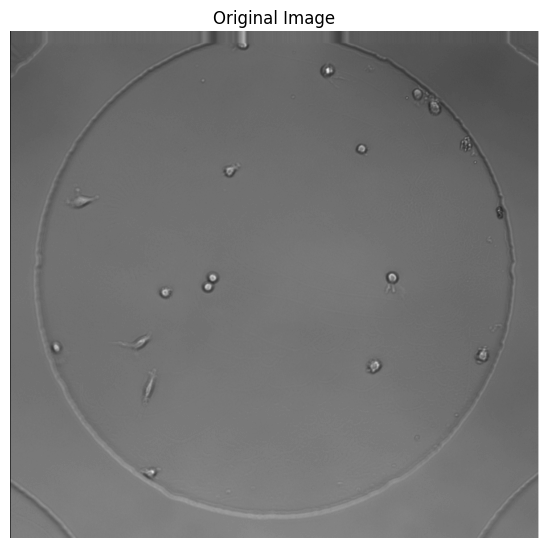

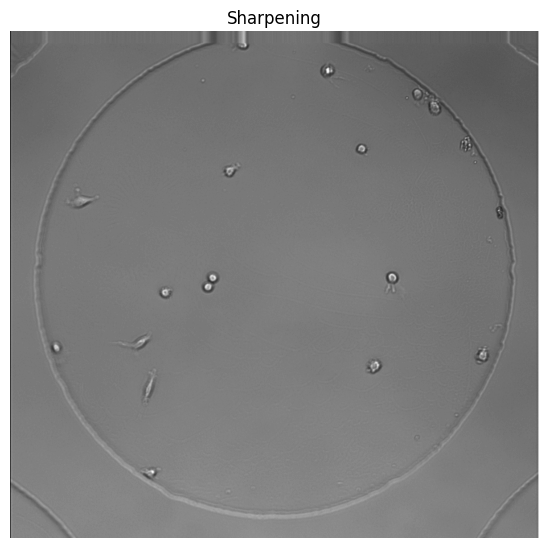

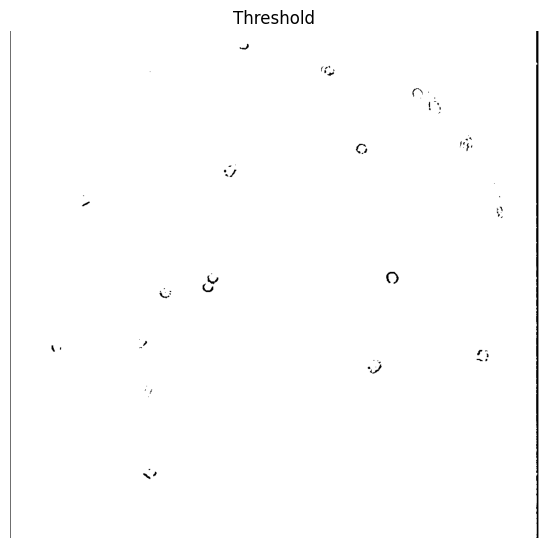

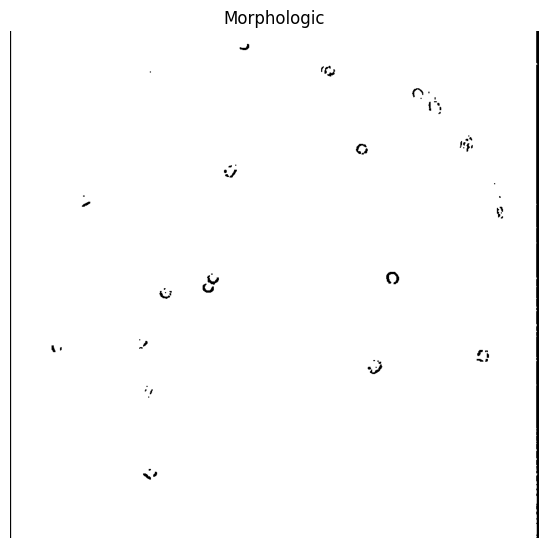

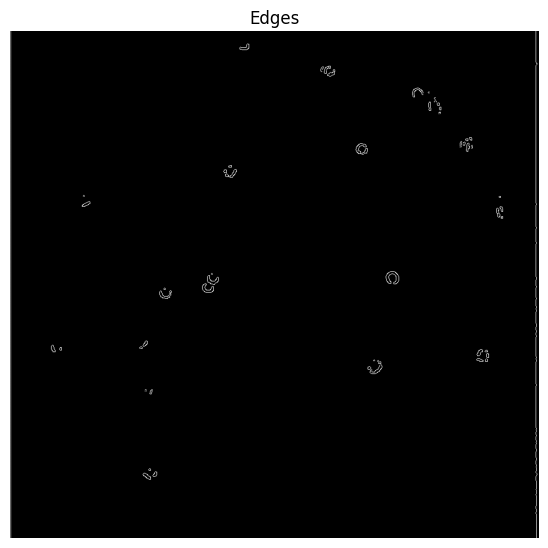

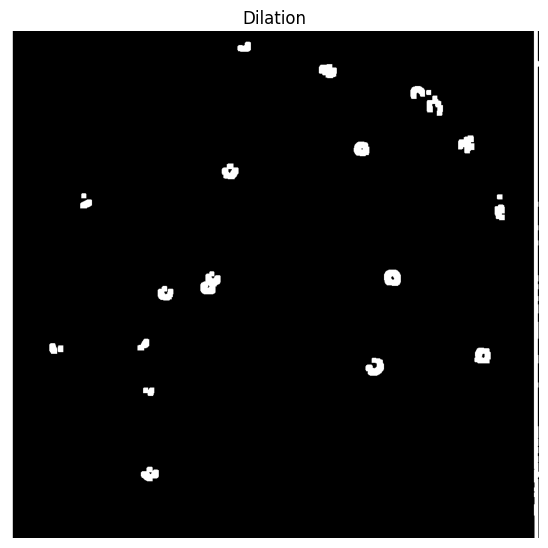

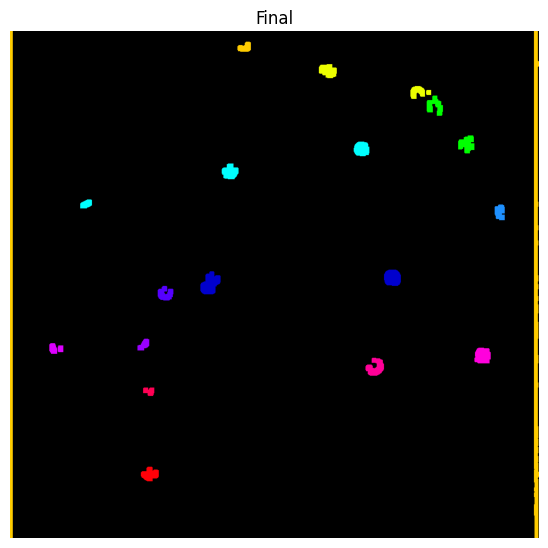

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def paintingFunction(label,circularity):
    #6 - bekle
    #11 gizle
    #12 gizle
    if 1 <= label <= 3:
        return (255,204,0)
    elif 4 <= label <= 6:
        return (237, 255, 0)
    elif 7 <= label <= 8:
        return (0, 255, 0)
    elif 9 == label:
        return (0, 255, 255)
    elif 10 <= label <= 13:
        if label == 11 or label == 12:
          return (0, 0, 0)
        else:
          return (0, 255, 255)
    elif 14 == label:
        return (30,144,255)
    elif 15 <= label <= 16:
        return (0, 0, 205)
    elif 17 == label:
        return (85,0,255)
    elif 18 == label:
        return (153,0,255)
    elif 19 <= label <= 20:
        return (221,0,255)
    elif 21 == label:
        return (255, 0, 221)
    elif 22 == label:
        return (255, 0, 152)
    elif 23 == label:
        return (255, 0, 84)
    elif 24 == label:
        return (255, 0,8)
    elif 25 >= label <= 100:
        return (255, 255,255)
    else:
      return (0, 0, 0)

imagePath = "hucre.png"
originalPhoto = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

if originalPhoto is None:
    print("Görsel bulunamadı! Lütfen dosya yolunu kontrol ediniz.")
else:
    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.axis('off')
    plt.imshow(originalPhoto, cmap='gray')

    gaussianBlurPhoto = cv2.GaussianBlur(originalPhoto, (9, 9), 10)
    sharpenedImage = cv2.addWeighted(originalPhoto, 1.5, gaussianBlurPhoto, -0.5, 0)

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.title('Sharpening')
    plt.axis('off')
    plt.imshow(sharpenedImage, cmap='gray')

    invertedThresh = cv2.adaptiveThreshold(sharpenedImage, 155, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 23, 29)

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.title('Threshold')
    plt.axis('off')
    plt.imshow(invertedThresh, cmap='gray')

    openingLastResult = cv2.morphologyEx(invertedThresh, cv2.MORPH_OPEN, np.ones((1, 1), np.uint8))
    erosionLastResult = cv2.erode(openingLastResult, np.ones((2, 2), np.uint8), iterations=1)

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.title('Morphologic')
    plt.axis('off')
    plt.imshow(erosionLastResult, cmap='gray')

    edgeList = cv2.Canny(erosionLastResult, 100,200)

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.title('Edges')
    plt.axis('off')
    plt.imshow(edgeList, cmap='gray')

    dilatedEdgeKernelSize = np.ones((7,7), np.uint8)
    dilatedEdgeFinalResult = cv2.dilate(edgeList,dilatedEdgeKernelSize,iterations=1)

    _, labels, stats, centroids = cv2.connectedComponentsWithStats(dilatedEdgeFinalResult)

    dilatedImage = dilatedEdgeFinalResult

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.title('Dilation')
    plt.axis('off')
    plt.imshow(dilatedImage, cmap='gray')

    dilatedImage = cv2.cvtColor(dilatedImage,cv2.COLOR_BGR2RGB)

    for i in range(1, len(stats)):

      area = stats[i][4]

      centroid = (stats[i][0], stats[i][1])
      direction = np.arctan2(centroid[1], centroid[0])
      circularity = 4 * np.pi * float(area) / (float(stats[i][2] * stats[i][3]))

      selectedPixels = (labels == i).astype(np.uint8) * 255
      color = paintingFunction(i,circularity) if circularity > 0.2 else (0, 0, 0)

      contours, _ = cv2.findContours(selectedPixels, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

      for j, contour in enumerate(contours, start=1):
          cv2.drawContours(dilatedImage, [contour], -1, color, thickness=cv2.FILLED)

      contours, _ = cv2.findContours(selectedPixels, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

      for j, contour in enumerate(contours, start=1):
          contourArea = cv2.contourArea(contour)
          contour_perimeter = cv2.arcLength(contour, True)
          compactness = contourArea / contour_perimeter if contour_perimeter != 0 else 0
          print("Hücre {} alanı: {}, Hücre çevresi: {}, Hücre kompaktlığı: {:.2f}".format(j, contourArea, contour_perimeter, compactness))

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.title('Final')
    plt.axis('off')
    plt.imshow(dilatedImage, cmap='gray')

Hücre 1 alanı: 3608.0, Hücre çevresi: 1812.0, Hücre kompaktlığı: 1.99
Hücre 1 alanı: 5690.0, Hücre çevresi: 1835.0538227558136, Hücre kompaktlığı: 3.10
Hücre 1 alanı: 293.5, Hücre çevresi: 74.38477599620819, Hücre kompaktlığı: 3.95
Hücre 1 alanı: 577.5, Hücre çevresi: 101.21320307254791, Hücre kompaktlığı: 5.71
Hücre 1 alanı: 404.0, Hücre çevresi: 96.28427076339722, Hücre kompaktlığı: 4.20
Hücre 1 alanı: 63.0, Hücre çevresi: 30.82842707633972, Hücre kompaktlığı: 2.04
Hücre 1 alanı: 560.5, Hücre çevresi: 150.04163014888763, Hücre kompaktlığı: 3.74
Hücre 1 alanı: 617.5, Hücre çevresi: 127.21320295333862, Hücre kompaktlığı: 4.85
Hücre 1 alanı: 576.0, Hücre çevresi: 92.28427064418793, Hücre kompaktlığı: 6.24
Hücre 1 alanı: 581.5, Hücre çevresi: 102.04163014888763, Hücre kompaktlığı: 5.70
Hücre 1 alanı: 63.0, Hücre çevresi: 30.82842707633972, Hücre kompaktlığı: 2.04
Hücre 1 alanı: 71.0, Hücre çevresi: 32.82842707633972, Hücre kompaktlığı: 2.16
Hücre 1 alanı: 235.5, Hücre çevresi: 62.3847759

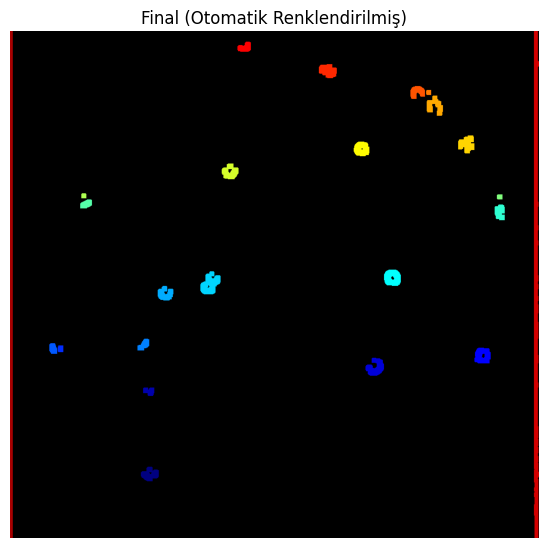

In [53]:
#Hücreleri manuel yerine otomatik Renklendirme

import cv2
import numpy as np
from matplotlib import pyplot as plt

imagePath = "hucre.png"
originalPhoto = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

if originalPhoto is None:
    print("Görsel bulunamadı! Lütfen dosya yolunu kontrol ediniz.")
else:

    gaussianBlurPhoto = cv2.GaussianBlur(originalPhoto, (9, 9), 10)
    sharpenedImage = cv2.addWeighted(originalPhoto, 1.5, gaussianBlurPhoto, -0.5, 0)


    invertedThresh = cv2.adaptiveThreshold(sharpenedImage, 155, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 23, 29)

    openingLastResult = cv2.morphologyEx(invertedThresh, cv2.MORPH_OPEN, np.ones((1, 1), np.uint8))
    erosionLastResult = cv2.erode(openingLastResult, np.ones((2, 2), np.uint8), iterations=1)

    edgeList = cv2.Canny(erosionLastResult, 100,200)

    dilatedEdgeKernelSize = np.ones((7,7), np.uint8)
    dilatedEdgeFinalResult = cv2.dilate(edgeList,dilatedEdgeKernelSize,iterations=1)

    _, labels, stats, centroids = cv2.connectedComponentsWithStats(dilatedEdgeFinalResult)

    dilatedImage = dilatedEdgeFinalResult

    dilatedImage = cv2.cvtColor(dilatedImage,cv2.COLOR_BGR2RGB)

    for i in range(1, len(stats)):

      area = stats[i][4]

      centroid = (stats[i][0], stats[i][1])
      direction = np.arctan2(centroid[1], centroid[0])
      circularity = 4 * np.pi * float(area) / (float(stats[i][2] * stats[i][3]))

      selectedPixels = (labels == i).astype(np.uint8) * 255

      contours, _ = cv2.findContours(selectedPixels, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

      for j, contour in enumerate(contours, start=1):
          contourArea = cv2.contourArea(contour)
          contour_perimeter = cv2.arcLength(contour, True)
          compactness = contourArea / contour_perimeter if contour_perimeter != 0 else 0
          print("Hücre {} alanı: {}, Hücre çevresi: {}, Hücre kompaktlığı: {:.2f}".format(j, contourArea, contour_perimeter, compactness))

    newMask = labels == 0
    autoColorImage = cv2.applyColorMap(np.uint8(labels * 255 / labels.max()), cv2.COLORMAP_JET)
    autoColorImage[newMask] = [0, 0, 0]

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.title('Final (Otomatik Renklendirilmiş)')
    plt.axis('off')
    plt.imshow(autoColorImage, cmap='gray')